In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
affordable_housing = pd.read_csv('../data/clean/result.csv')
affordable_housing["CITY"] = affordable_housing["CITY"].apply(lambda x: x.lower())
affordable_housing["ZIPCODE"] = affordable_housing["ZIPCODE"].apply(lambda x: str(x).zfill(5))

affordable = affordable_housing[affordable_housing["IS_AFFORDABLE"] == True].reset_index(drop=True)
non_affordable = affordable_housing[affordable_housing["IS_AFFORDABLE"] == False].reset_index(drop=True)
affordable_housing

,OWN_OCC,LU_DESC,UNIT_NUM,ST_NUM,ST_NAME,ZIPCODE,CITY,RES_UNITS,OWNER,join_idx,IS_AFFORDABLE
0,Y,THREE-FAM DWELLING,NaN,104.0,PUTNAM ST,02128,east boston,0,PASCUCCI CARLO,104 putnam,False
1,Y,THREE-FAM DWELLING,NaN,197.0,LEXINGTON ST,02128,east boston,0,SEMBRANO RODERICK,197 lexington,False
2,N,THREE-FAM DWELLING,NaN,199.0,LEXINGTON ST,02128,east boston,0,CHEVARRIA ANA S,199 lexington,False
3,N,THREE-FAM DWELLING,NaN,201.0,LEXINGTON ST,02128,east boston,0,"MADDALENI JAMES E, TS",201 lexington,False
4,Y,TWO-FAM DWELLING,NaN,203.0,LEXINGTON ST,02128,east boston,0,DIGIROLAMO JOHN A,203 lexington,False
...,...,...,...,...,...,...,...,...,...,...,...
275405,N,STRIP CTR STORES,NaN,2198.0,COMMONWEALTH AV,02135,brighton,0,GREALISH MARTIN J TRST,2198 commonwealth,False
275406,N,STRIP CTR STORES,NaN,2199.0,COMMONWEALTH AV,02135,brighton,0,GREALISH MARTIN J TRST,2199 commonwealth,False
275407,N,STRIP CTR STORES,NaN,2200.0,COMMONWEALTH AV,02135,brighton,0,GREALISH MARTIN J TRST,2200 commonwealth,False
275408,N,STRIP CTR STORES,NaN,2201.0,COMMONWEALTH AV,02135,brighton,0,GREALISH MARTIN J TRST,2201 commonwealth,False


In [84]:
neighborhood = pd.read_csv('../data/clean/neighborhood.csv')
neighborhood["city"] = neighborhood["city"].apply(lambda x: x.lower())
neighborhood

,city,white,white.1,black,black.1,hispanic,hispanic.1,asian,other,household,...,juvenile,nursing,other_institutional,noninstitutionalized,college,military,other_noninstitutional,occupied,vacant,household_size
0,allston,14634,14022,1451,1294,3657,3071,7173,1706,25231,...,0,26,0,3364,3214,0,150,11740,787,2.149148
1,back bay,14056,13296,718,669,1326,1205,2604,884,17618,...,0,269,0,1701,1578,0,123,10788,1585,1.633111
2,beacon hill,7521,6980,252,231,537,475,630,396,9303,...,0,0,0,33,0,0,33,5485,552,1.696080
3,brighton,30596,28706,2289,1966,4978,4043,7801,2666,44308,...,13,240,56,3713,3493,0,220,20822,1052,2.127942
4,charlestown,13626,11689,990,662,2075,1387,1650,779,19010,...,0,55,0,55,0,30,25,8932,593,2.128303
5,chinatown,1898,1790,297,254,477,412,4281,190,6462,...,0,224,0,457,443,0,14,3299,345,1.958775
6,dorchester,27411,24327,42714,32678,25285,17390,13360,13421,120678,...,286,291,0,936,0,0,936,44823,3142,2.692323
7,downtown,9174,8764,537,529,961,877,2286,493,9238,...,0,97,0,4116,3283,0,833,5401,1253,1.710424
8,east boston,15760,14039,1403,1136,21700,16256,1932,2271,42813,...,12,132,0,109,0,0,109,16695,1321,2.564420
9,fenway,20456,20099,2396,2281,3643,3425,9218,2020,21013,...,0,261,0,16406,16197,0,209,12661,1307,1.659664


# 1. What is the current distribution of landlords NOT currently enrolled in different affordable housing programs?

In [85]:
# 1.1 # of non-affordable units
num_units_non_affordable = non_affordable["RES_UNITS"].sum()
print(f"1.1 Number of units in non-affordable housing: {num_units_non_affordable:,d}")

1.1 Number of units in non-affordable housing: 433,691


1.2 Geographic distribution by zip code of non-affordable units


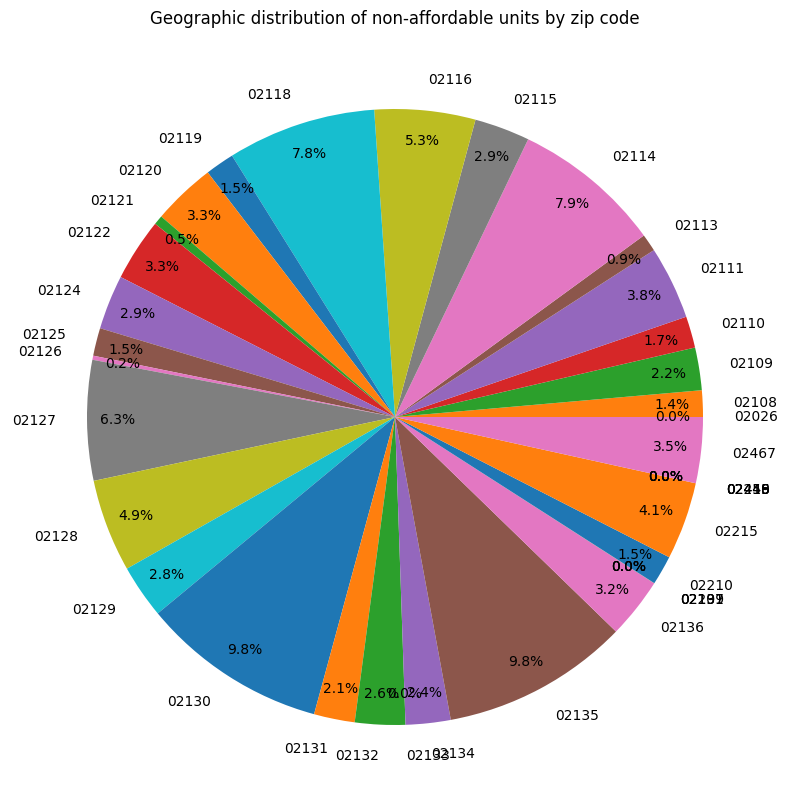

In [86]:
# 1.2 Geographic distribution by zip code of non-affordable units
print(f"1.2 Geographic distribution by zip code of non-affordable units")
non_affordable_zip = non_affordable.groupby("ZIPCODE").sum(numeric_only=True)["RES_UNITS"]
zip_codes = non_affordable_zip.index
plt.figure(figsize=(20, 10))
plt.pie(non_affordable_zip, labels=zip_codes, autopct='%1.1f%%', pctdistance=0.9)
plt.title("Geographic distribution of non-affordable units by zip code")
plt.show()

1.3 Demographic profile of census block groups
In non-affordable districts, the most prevalent races are:


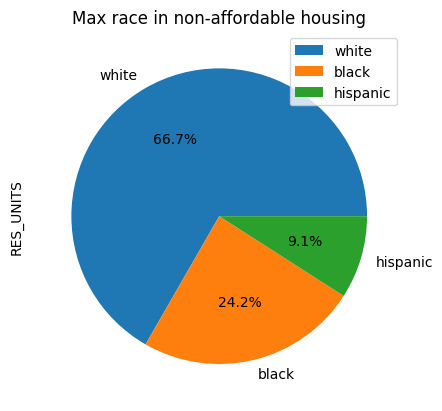

In [87]:
# 1.3 Demographic profile of census block groups (majority race, ethnicity, income)
print(f"1.3 Demographic profile of census block groups")

# merge neighborhood and non_affordable
non_affordable_per_city = non_affordable.groupby("CITY").sum(numeric_only=True)[["RES_UNITS"]]
non_affordable_with_races = non_affordable_per_city.merge(neighborhood, left_on="CITY", right_on="city")

# Plot distribution of race
print("In non-affordable districts, the most prevalent races are:")
race_columns = ["white", "black", "asian", "hispanic", "other"]
def get_max_race(row):
    max_race = max(row[race_columns])
    for race in race_columns:
        if row[race] == max_race:
            return race

non_affordable_with_races["max_race"] = non_affordable_with_races.apply(get_max_race, axis=1)
non_affordable_with_races.groupby("max_race").sum(numeric_only=True)[["RES_UNITS"]].sort_values(by="RES_UNITS", ascending=False).plot.pie(y="RES_UNITS", autopct='%1.1f%%')
plt.title("Max race in non-affordable housing")
plt.show()

## b) What is the breakdown of landlords (in percent) listed under current affordable housing programs?

TRUSTEES OF BOSTON COLLEGE             185
BUCKMINSTER HOTEL CORP                 132
CITY OF BOSTON                         109
121 PORTLAND LLC                        37
420 WEST BROADWAY CONDOMINIUM TRUST     36
FENWAY APARTMENTS LLC MASS LLC          32
PUTNAM 234 ASSOCIATES LLC MASS LLC      20
MASS BAY TRANSPORTATION AUTH            15
CHARLESTOWN PROPERTIES LLC              14
CITY OF BOSTON BY FCL                   13
Name: OWNER, dtype: int64

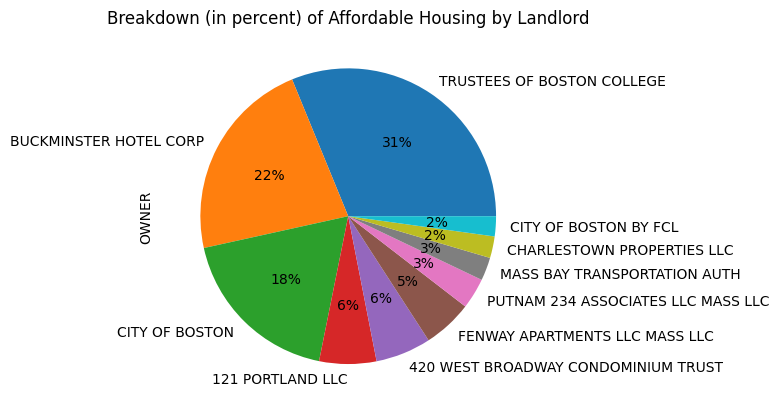

In [88]:
distribution = affordable["OWNER"].value_counts().head(10)
distribution.plot.pie(autopct='%.0f%%', title="Breakdown (in percent) of Affordable Housing by Landlord")
distribution

## c) What is the geographic distribution of these landlords by city council district?

boston             3451
south boston        582
dorchester          555
east boston         473
brighton            444
jamaica plain       279
charlestown         245
allston             237
roxbury             144
west roxbury         81
hyde park            45
roxbury crossin      36
mattapan             32
roslindale           22
chestnut hill         2
Name: CITY, dtype: int64

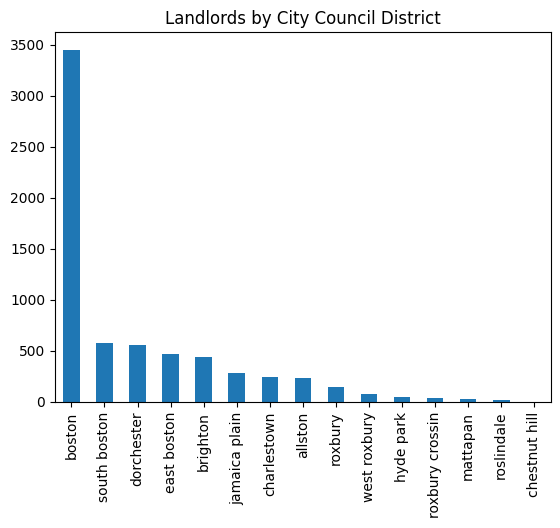

In [89]:
distribution = affordable["CITY"].value_counts()
distribution.plot(kind='bar', title='Landlords by City Council District')
distribution

# d) What percentage of housing stock is owned by owner occupied and small landlords, and at what % affordable

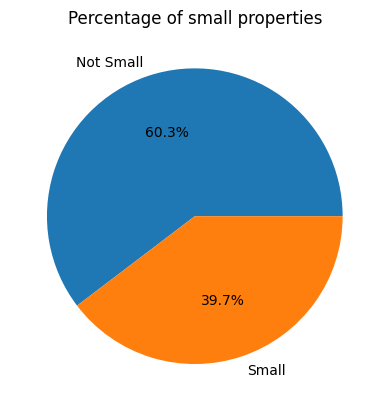

In [90]:
# Get small properties (less than or equal to 10 and bigger than 0)
small = affordable_housing[(affordable_housing["RES_UNITS"] <= 10) & (affordable_housing["RES_UNITS"] > 0)]

# Plot percentage of small properties
plt.pie(((affordable_housing["RES_UNITS"] <= 10) & (affordable_housing["RES_UNITS"] > 0)).value_counts(), labels=["Not Small", "Small"], autopct='%1.1f%%')
plt.title("Percentage of small properties")
plt.show()

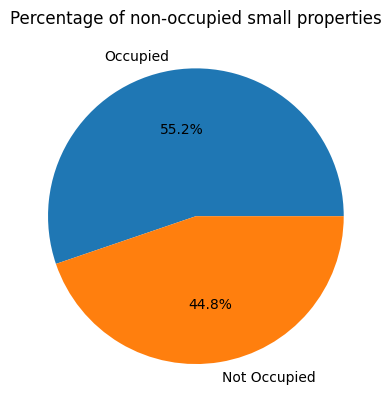

In [91]:
# Get non-occupied small properties
small_unocc = small[small["OWN_OCC"] == "N"]

# Plot percentage of non-occupied small properties
plt.pie((small["OWN_OCC"] == "N").value_counts(), labels=["Occupied", "Not Occupied"], autopct='%1.1f%%')
plt.title("Percentage of non-occupied small properties")
plt.show()

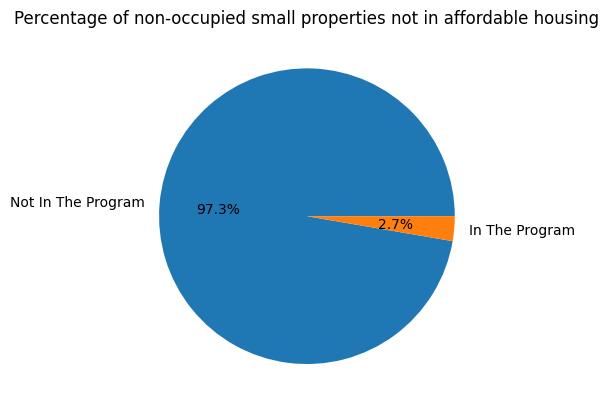

In [92]:
# Get non-occupied small properties not in affordable housing
small_unocc_non_aff = small_unocc[small_unocc["IS_AFFORDABLE"] == False]

# Plot percentage of non-occupied small properties not in affordable housing
plt.pie((small_unocc["IS_AFFORDABLE"] == False).value_counts(), labels=["Not In The Program", "In The Program"], autopct='%1.1f%%')
plt.title("Percentage of non-occupied small properties not in affordable housing")
plt.show()

In [93]:
small_unocc_non_aff = small_unocc_non_aff.drop(columns=["IS_AFFORDABLE", "join_idx"])
small_unocc_non_aff.to_csv("../data/clean/small_unocc_non_aff.csv", index=False)
small_unocc_non_aff

,OWN_OCC,LU_DESC,UNIT_NUM,ST_NUM,ST_NAME,ZIPCODE,CITY,RES_UNITS,OWNER
21,N,CONDO MAIN,NaN,239.0,LEXINGTON ST,02128,east boston,4,TEWARIE GROUP CONDOMINIUMS TRUST
26,N,CONDO MAIN,NaN,241.0,LEXINGTON ST,02128,east boston,3,241 LEXINGTON STREET CONDOMINIUM TRUST
27,N,RESIDENTIAL CONDO,1,241.0,LEXINGTON ST,02128,east boston,1,GRIFFIN MICHAEL THOMAS
29,N,RESIDENTIAL CONDO,3,241.0,LEXINGTON ST,02128,east boston,1,HORNEIJ PER
34,N,CONDO MAIN,NaN,249.0,LEXINGTON ST,02128,east boston,3,249 LEXINGTON STREET CONDOMINIUM TRUST
...,...,...,...,...,...,...,...,...,...
275281,N,RESIDENTIAL CONDO,2,96.0,UNDINE ST,02135,brighton,1,MCKAY YVONNE T TS
275344,N,CONDO MAIN,NaN,12.0,KENRICK ST,02135,brighton,2,TWELVE KENRICK ST CONDO TR
275346,N,RESIDENTIAL CONDO,2,12.0,KENRICK ST,02135,brighton,1,WEI WENJIN
275395,N,RESIDENTIAL CONDO,2,14.0,LAKE ST,02135,brighton,1,LIU PI-YAO A


# Extension project

In [94]:
voter_ma = pd.read_csv('../data/clean/voter_ma_info.csv').fillna("")
voter_ma

,Residence_Addresses_AddressLine,Residence_Addresses_City,Residence_Addresses_State,Residence_Addresses_StreetName,Residence_HHGender_Description,Residence_HHParties_Description,Voters_FirstName,Voters_MiddleName,Voters_LastName,Voters_NameSuffix,Parties_Description,Ethnic_Description,EthnicGroups_EthnicGroup1Desc,CommercialData_EstHomeValue,CommercialData_EstimatedHHIncomeAmount
0,67 Acorn Rd,Dennis,MA,Acorn,Male Only Household,Independent,Lilavois,,Frantzo,,Non-Partisan,,,$480131,$76957
1,87 Acorn Rd,Dennis,MA,Acorn,Male Only Household,Independent,Marsden,Carter,Hedrick,II,Non-Partisan,German,European,$480131,$76957
2,5 Armstrong Ave,Bourne,MA,Armstrong,Female Only Household,Independent,Katie,Lynn,Maloon,,Non-Partisan,,,$386259,$118213
3,110 Bakers Pond Rd,South Dennis,MA,Bakers Pond,Female Only Household,Independent,Eileen,S,Penn,,Non-Partisan,English/Welsh,European,$660258,$250000
4,141 Bakers Pond Rd,South Dennis,MA,Bakers Pond,Female Only Household,Independent,Lita,B,Isabelle,,Non-Partisan,French,European,$137500,$73199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506884,51 Wellington St Apt 401,Worcester,MA,Wellington,Female Only Household,Democratic,Gladys,,Rivera Rivera,,Democratic,Hispanic,Hispanic and Portuguese,$212499,$20832
4506885,51 Wellington St Apt 401,Worcester,MA,Wellington,Male Only Household,Democratic,Angel,Ramon,Gonzalez Guzman,,Democratic,Hispanic,Hispanic and Portuguese,$212499,$20832
4506886,51 Wellington St Apt 404,Worcester,MA,Wellington,Female Only Household,Democratic,Deena,M,Particianone,,Democratic,,,$212499,$9000
4506887,51 Wellington St Apt 501,Worcester,MA,Wellington,Male Only Household,Independent,Natanael,,De La Rosa,,Non-Partisan,Hispanic,Hispanic and Portuguese,$212499,$6000


In [95]:
import re

small_unocc_non_aff["join_idx"] = small_unocc_non_aff["OWNER"].apply(lambda x: re.sub(r"[^a-zA-Z0-9]+", ' ', x).lower())

def process_voter_ma(row):
    fname = row['Voters_FirstName'].lower()
    lname = row['Voters_LastName'].lower()
    middle = row['Voters_MiddleName'].lower()
    name = f"{fname} {middle} {lname}"
    name = re.sub(r"[^a-zA-Z0-9]+", ' ', name)
    return name

voter_ma["join_idx"] = voter_ma.apply(process_voter_ma, axis=1)
voter_ma

,Residence_Addresses_AddressLine,Residence_Addresses_City,Residence_Addresses_State,Residence_Addresses_StreetName,Residence_HHGender_Description,Residence_HHParties_Description,Voters_FirstName,Voters_MiddleName,Voters_LastName,Voters_NameSuffix,Parties_Description,Ethnic_Description,EthnicGroups_EthnicGroup1Desc,CommercialData_EstHomeValue,CommercialData_EstimatedHHIncomeAmount,join_idx
0,67 Acorn Rd,Dennis,MA,Acorn,Male Only Household,Independent,Lilavois,,Frantzo,,Non-Partisan,,,$480131,$76957,lilavois frantzo
1,87 Acorn Rd,Dennis,MA,Acorn,Male Only Household,Independent,Marsden,Carter,Hedrick,II,Non-Partisan,German,European,$480131,$76957,marsden carter hedrick
2,5 Armstrong Ave,Bourne,MA,Armstrong,Female Only Household,Independent,Katie,Lynn,Maloon,,Non-Partisan,,,$386259,$118213,katie lynn maloon
3,110 Bakers Pond Rd,South Dennis,MA,Bakers Pond,Female Only Household,Independent,Eileen,S,Penn,,Non-Partisan,English/Welsh,European,$660258,$250000,eileen s penn
4,141 Bakers Pond Rd,South Dennis,MA,Bakers Pond,Female Only Household,Independent,Lita,B,Isabelle,,Non-Partisan,French,European,$137500,$73199,lita b isabelle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506884,51 Wellington St Apt 401,Worcester,MA,Wellington,Female Only Household,Democratic,Gladys,,Rivera Rivera,,Democratic,Hispanic,Hispanic and Portuguese,$212499,$20832,gladys rivera rivera
4506885,51 Wellington St Apt 401,Worcester,MA,Wellington,Male Only Household,Democratic,Angel,Ramon,Gonzalez Guzman,,Democratic,Hispanic,Hispanic and Portuguese,$212499,$20832,angel ramon gonzalez guzman
4506886,51 Wellington St Apt 404,Worcester,MA,Wellington,Female Only Household,Democratic,Deena,M,Particianone,,Democratic,,,$212499,$9000,deena m particianone
4506887,51 Wellington St Apt 501,Worcester,MA,Wellington,Male Only Household,Independent,Natanael,,De La Rosa,,Non-Partisan,Hispanic,Hispanic and Portuguese,$212499,$6000,natanael de la rosa


In [96]:
voter_and_small = voter_ma.merge(small_unocc_non_aff, on="join_idx", how="inner")
voter_and_small.to_csv("../data/clean/voter_and_small.csv", index=False)
voter_and_small

,Residence_Addresses_AddressLine,Residence_Addresses_City,Residence_Addresses_State,Residence_Addresses_StreetName,Residence_HHGender_Description,Residence_HHParties_Description,Voters_FirstName,Voters_MiddleName,Voters_LastName,Voters_NameSuffix,...,join_idx,OWN_OCC,LU_DESC,UNIT_NUM,ST_NUM,ST_NAME,ZIPCODE,CITY,RES_UNITS,OWNER
0,800 Bearses Way Apt 5NF,Hyannis,MA,Bearses,Male Only Household,Democratic,Adrien,,Joseph,,...,adrien joseph,N,RESIDENTIAL CONDO,800-21,800.0,HYDE PARK AV,02136,hyde park,1,ADRIEN JOSEPH
1,56 Kelley Rd,West Harwich,MA,Kelley,Mixed Gender Household,Republican,Joanne,Stacie,Logie,,...,joanne stacie logie,N,RESIDENTIAL CONDO,2,18.0,COOPER ST,02113,boston,1,JOANNE STACIE LOGIE
2,546 Route 28,Harwich Port,MA,Route 28,Male Only Household,Republican & Independent,Curtis,,Douglas,,...,curtis douglas,N,RESIDENTIAL CONDO,4,31.0,BAY STATE RD,02215,boston,1,CURTIS DOUGLAS
3,34 Fish House Rd,East Sandwich,MA,Fish House,Female Only Household,Independent,Li,,Li,,...,li li,N,RESIDENTIAL CONDO,45,6.0,SUTHERLAND RD,02135,brighton,1,LI LI
4,237 N Main St Apt 8,Andover,MA,Main,Male Only Household,Independent,Li,,Li,,...,li li,N,RESIDENTIAL CONDO,45,6.0,SUTHERLAND RD,02135,brighton,1,LI LI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,36 Ashburnham Hill Rd Apt 2,Fitchburg,MA,Ashburnham Hill,Female Only Household,Democratic,Stella,,Michael,,...,stella michael,N,RESIDENTIAL CONDO,6-L,5.0,MELBOURNE ST,02124,dorchester,1,STELLA MICHAEL
301,36 Ashburnham Hill Rd Apt 2,Fitchburg,MA,Ashburnham Hill,Female Only Household,Democratic,Stella,,Michael,,...,stella michael,N,RESIDENTIAL CONDO,7-L,5.0,MELBOURNE ST,02124,dorchester,1,STELLA MICHAEL
302,36 Ashburnham Hill Rd Apt 2,Fitchburg,MA,Ashburnham Hill,Female Only Household,Democratic,Stella,,Michael,,...,stella michael,N,RESIDENTIAL CONDO,8-L,5.0,MELBOURNE ST,02124,dorchester,1,STELLA MICHAEL
303,36 Ashburnham Hill Rd Apt 2,Fitchburg,MA,Ashburnham Hill,Female Only Household,Democratic,Stella,,Michael,,...,stella michael,N,RESIDENTIAL CONDO,101,101.0,CLAYBOURNE ST,02124,dorchester,1,STELLA MICHAEL


In [97]:
stat_cols = [
    "Residence_HHGender_Description",
    "Residence_HHParties_Description",
    "Parties_Description",
    "Ethnic_Description",
    "EthnicGroups_EthnicGroup1Desc"
]

stat_cols_num = [
    "CommercialData_EstHomeValue",
    "CommercialData_EstimatedHHIncomeAmount"
]

In [98]:
voter_and_small[stat_cols]

,Residence_HHGender_Description,Residence_HHParties_Description,Parties_Description,Ethnic_Description,EthnicGroups_EthnicGroup1Desc
0,Male Only Household,Democratic,Democratic,Likely Af-Am (Modeled),Likely African-American
1,Mixed Gender Household,Republican,Republican,Scots,European
2,Male Only Household,Republican & Independent,Republican,Scots,European
3,Female Only Household,Independent,Non-Partisan,Chinese,East and South Asian
4,Male Only Household,Independent,Non-Partisan,Chinese,East and South Asian
...,...,...,...,...,...
300,Female Only Household,Democratic,Democratic,English/Welsh,European
301,Female Only Household,Democratic,Democratic,English/Welsh,European
302,Female Only Household,Democratic,Democratic,English/Welsh,European
303,Female Only Household,Democratic,Democratic,English/Welsh,European


In [99]:
def to_dollar(s):
    s = s.replace("$", "").replace(",", "")
    if s == "":
        return 0
    return float(s)

for stat in stat_cols_num:
    voter_and_small[stat] = voter_and_small[stat].apply(to_dollar).astype(float)
voter_and_small[stat_cols_num] = voter_and_small[stat_cols_num].apply(pd.to_numeric)
voter_and_small[stat_cols_num]

,CommercialData_EstHomeValue,CommercialData_EstimatedHHIncomeAmount
0,613949.0,170000.0
1,625000.0,84538.0
2,459614.0,76874.0
3,569312.0,131377.0
4,431896.0,137201.0
...,...,...
300,112500.0,41772.0
301,112500.0,41772.0
302,112500.0,41772.0
303,112500.0,41772.0


Plotting distribution of units for Residence_HHGender_Description


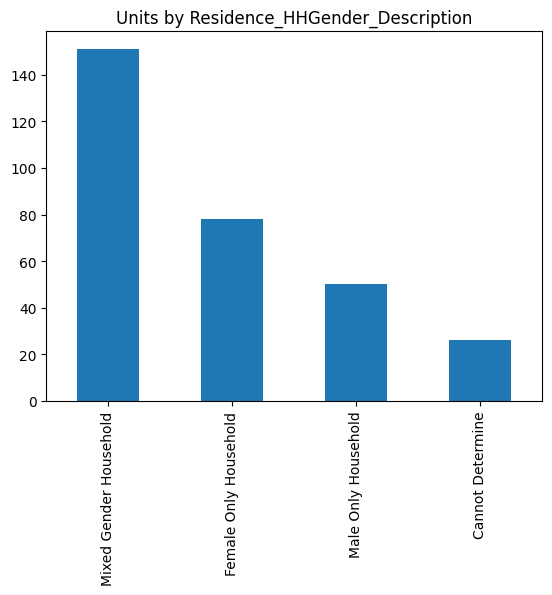

Plotting distribution of units for Residence_HHParties_Description


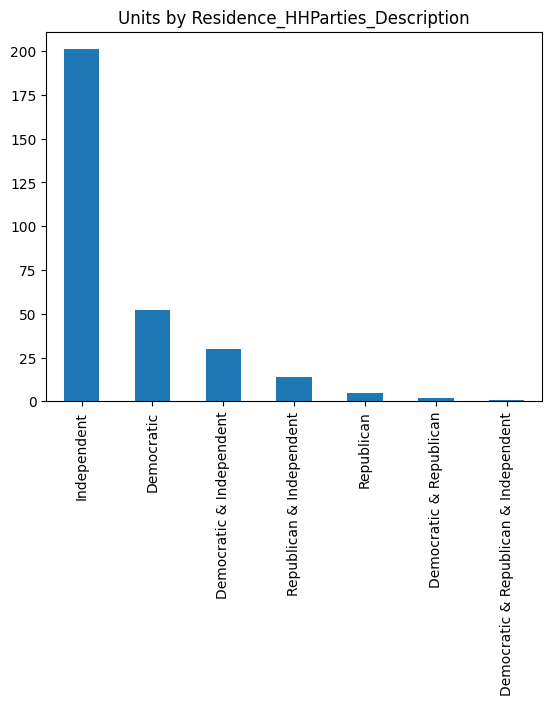

Plotting distribution of units for Parties_Description


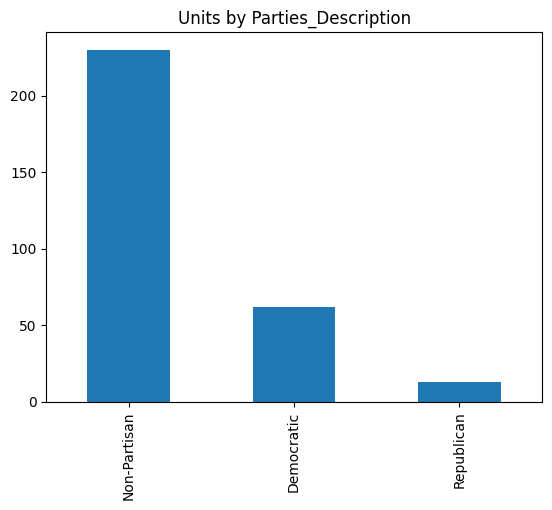

Plotting distribution of units for Ethnic_Description


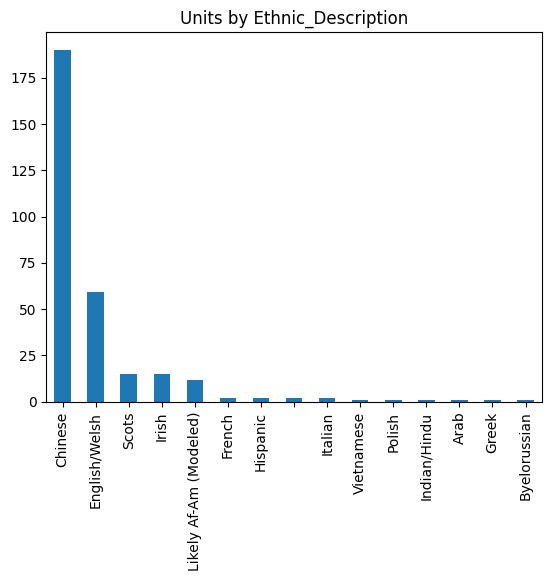

Plotting distribution of units for EthnicGroups_EthnicGroup1Desc


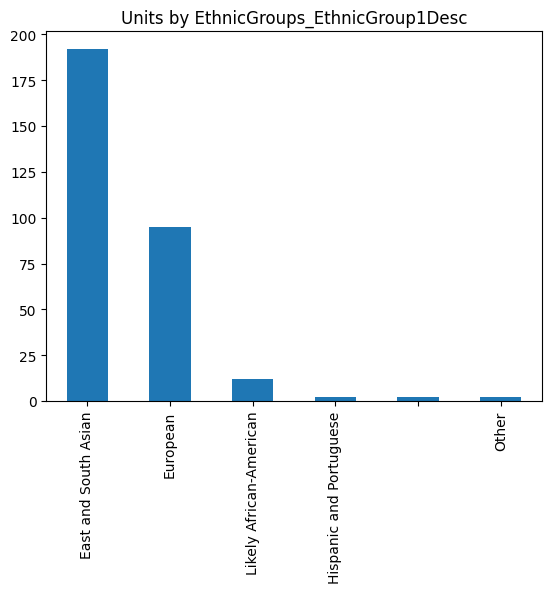

In [100]:
# Plot distribution of units for each stat column
for col in stat_cols:
    print(f"Plotting distribution of units for {col}")
    distribution = voter_and_small[col].value_counts()
    distribution.plot(kind='bar', title=f"Units by {col}")
    plt.show()

Plotting hist of units for CommercialData_EstHomeValue


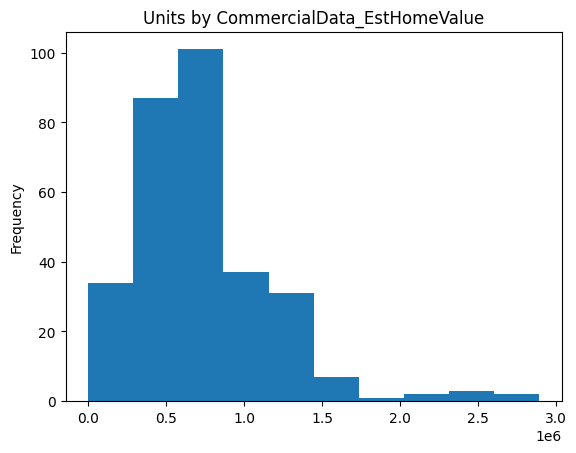

Plotting hist of units for CommercialData_EstimatedHHIncomeAmount


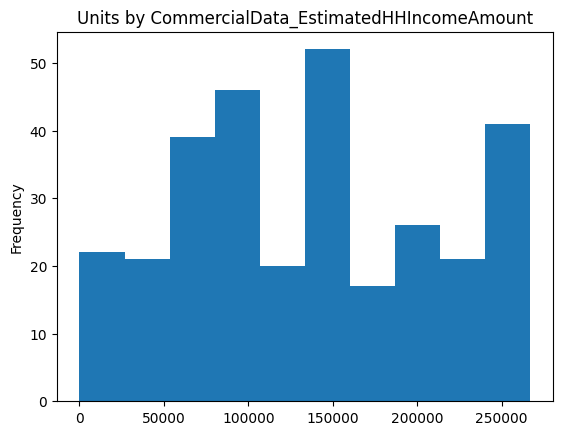

In [101]:
# Plot hist of units for each stat num column
for col in stat_cols_num:
    print(f"Plotting hist of units for {col}")
    distribution = voter_and_small[col]
    distribution.plot.hist(title=f"Units by {col}")
    plt.show()